## IDR2.1 Full Run Waterfalls
Katherine Elder

The first part of this notebook is to create waterfall plots of the entire IDR2.1 run for all four polarizations. The second part is to create delay spectrums for each polarization. 

In [7]:
#Initialize the matplotlib notebook
%matplotlib notebook
#Import needed packages
from pyuvdata import UVData
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from astropy.time import Time
import matplotlib
import amp_delay_plotting as adp

#Create uv elements
uvxy = UVData()
uvyx = UVData()
uvxx = UVData()
uvyy = UVData()

#Define variables to hold the antenna numbers to look at
ant1 = 142
ant2 = 140

#Define variables to set where the array will start printing and how many steps it goes by
start_index = 500
step = 50

In [57]:
#Create lists of the data

#Create a list for the xy data
xy_files = glob.glob('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/zen*.uvfits')
xy_files.sort()

#Create a list of the yx data
yx_files = glob.glob('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/zen*.uvfits')
yx_files.sort()

#Create a list of the xx data
xx_files = glob.glob('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xx_time_split_data/combined_files/zen*.uvfits')
xx_files.sort()

#Create a list of the yy data
yy_files = glob.glob('/data6/HERA/data/IDR2.1/uvOCRSL_yy_time_split_data/*.uvfits')
yy_files.sort()

## Part 1: Waterfalls

We want to be able to take a look at the visibilities for the entire run in a waterfall plot. To do this, we read in the data for the specified antenna pair and combine it into an array. This is the array that will then be plotted. 

We repeat the process for all four polarizations.

In [9]:
#Set first to true to initialize the array
first = True
xy_array=[]

for my_file in xy_files:
    #Read in the given file for the set antenna pair
    uvxy.read_uvfits(my_file, antenna_nums=[(ant1,ant2)], run_check=False, run_check_acceptability=False)
    #Unphase the data
    uvxy.unphase_to_drift()
    #print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array = uvxy.get_data((ant1,ant2))
    #Get the times of the antennas
    times = uvxy.get_times(ant1,ant2)
    #Check if the array has already been initialized
    if first == True:
        #print('setting full for first time')
        xy_array = temp_array
        xy_timearr = times
        first = False
    else:
        #print('vstacking...')
        xy_array = np.vstack((xy_array, temp_array))
        xy_timearr = np.hstack((xy_timearr,times))

print 'Array shape:', xy_array.shape
print 'Time shape:', xy_timearr.shape
   

Array shape: (2374, 1024)
Time shape: (2374,)


In [100]:
#Convert the times from julian date to LST
lat, lon, alt = uvxy.telescope_location_lat_lon_alt_degrees
t = Time(xy_timearr, format='jd', location=(lon,lat))
lstarrayxy = t.sidereal_time(kind='apparent').hour

print lstarrayxy.shape

(2374,)


<IPython.core.display.Javascript object>


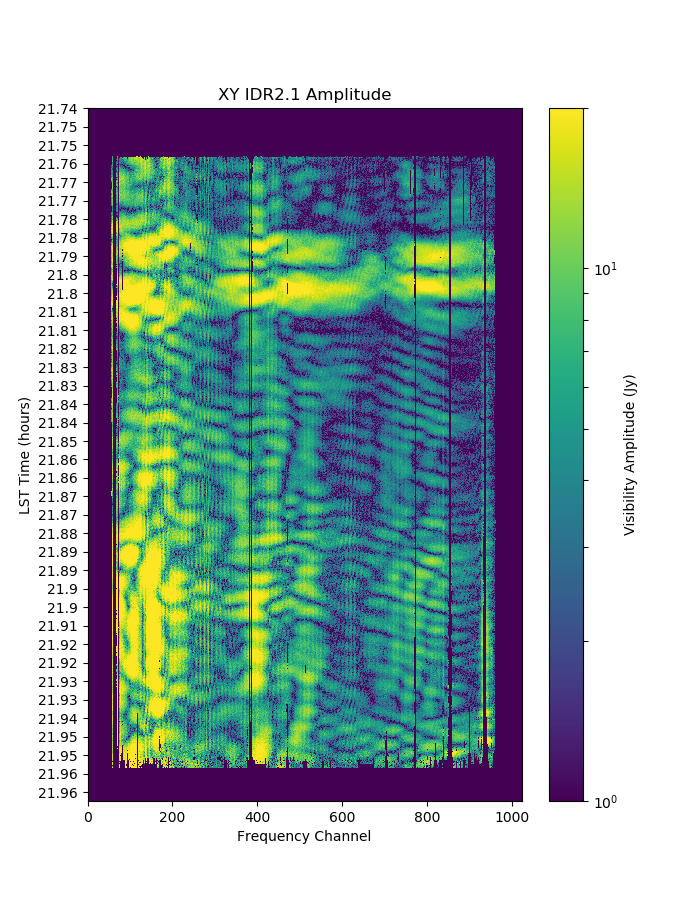

In [60]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(xy_array[start_index:,:]),aspect='auto',norm=SymLogNorm(vmin=1,vmax=20,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarrayxy)-start_index,step), np.round(lstarrayxy*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('XY IDR2.1 Amplitude')
plt.show()

In [14]:
#Set first to true to initialize the array
first = True
#Create a new array for this set of data
yx_array = []

for my_file in yx_files:
    #Read in the given data file for the chosen antenna pair
    uvyx.read_uvfits(my_file, antenna_nums=[(ant1,ant2)], run_check=False, run_check_acceptability=False)
    #print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array = uvyx.get_data((ant1,ant2))
    #Get the times of the antenna
    times = uvyx.get_times(ant1,ant2)
    #Check if the array has already been initialized
    if first ==True:
        print('setting full for first time')
        yx_array = temp_array
        yx_timearr = times
        first = False
    else:
        #print('vstacking...')
        yx_array = np.vstack((yx_array, temp_array))
        yx_timearr = np.hstack((yx_timearr,times))

print 'Array shape:', yx_array.shape
print 'Time shape:', yx_timearr.shape

setting full for first time
Array shape: (2374, 1024)
Time shape: (2374,)


<IPython.core.display.Javascript object>


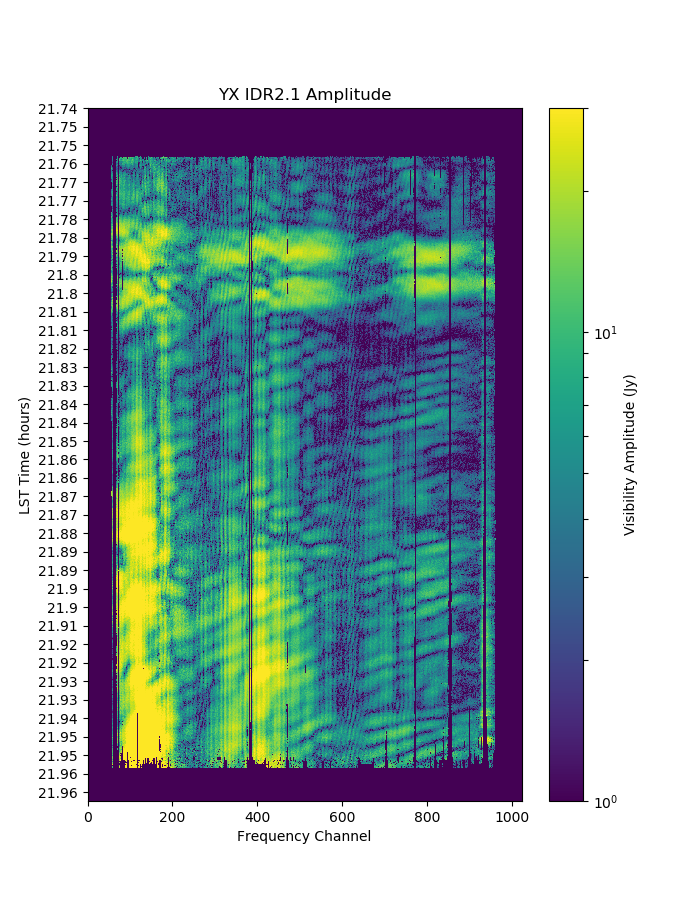

In [61]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(yx_array[start_index:,:]),aspect='auto',norm=SymLogNorm(vmin=1,vmax=30,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarray)-start_index,step), np.round(lstarray*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YX IDR2.1 Amplitude')
plt.show()

Now that we have been able to read in and plot the entire night of cross pol data, let's plot them side by side. We will lock the axes together so that when we zoom in on one plot, it zooms in on the other as well. 

<IPython.core.display.Javascript object>


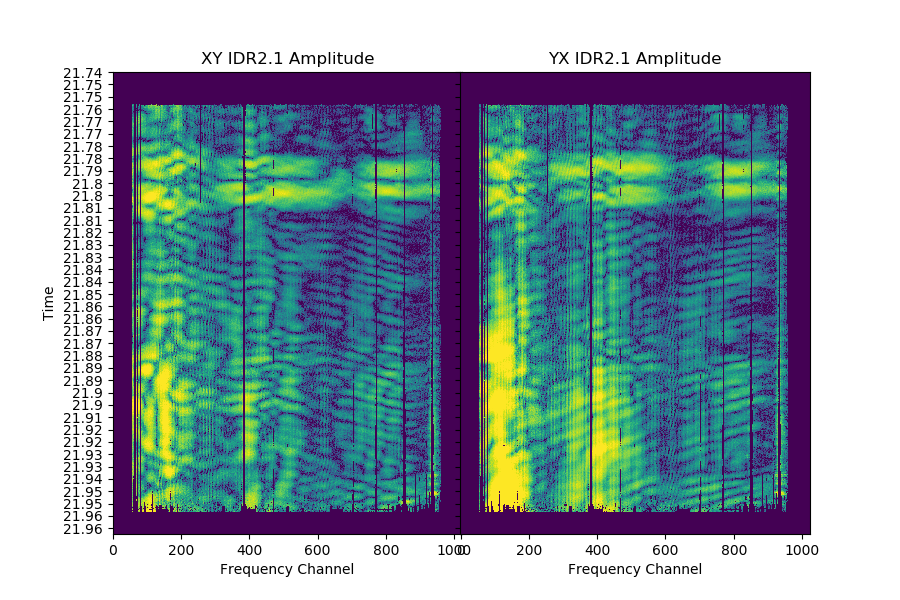

In [62]:
#Open a figure
fig = plt.figure(figsize=(9,6))

#Create two subplots and lock the axes in place
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, sharey = ax1, sharex = ax1)

#Plot the first image
plt.subplot(ax1)
plt.imshow(np.abs(xy_array[start_index:,:]),aspect='auto',norm=SymLogNorm(vmin=1,vmax=30,linthresh=.1))
plt.yticks(np.arange(0,len(lstarray)-start_index,step), np.round(lstarray*100)/100)
plt.ylabel('Time')
plt.xlabel('Frequency Channel')
plt.title('XY IDR2.1 Amplitude')

#Plot the second image
plt.subplot(ax2)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.imshow(np.abs(yx_array[start_index:,:]),aspect='auto',norm=SymLogNorm(vmin=1,vmax=30,linthresh=.1))
plt.yticks(np.arange(0,len(lstarray)-start_index,step), np.round(lstarray*100)/100)
#plt.colorbar(label='Amplitude')
plt.xlabel('Frequency Channel')
plt.title('YX IDR2.1 Amplitude')

#Adjust the spacing between the plots
plt.subplots_adjust(wspace = -.005)

Now let's create the arrays for the parallel polarized data and plot waterfalls.

In [63]:
#Set first to true to initialize the array
first = True
xx_array=[]

for my_file in xx_files:
    #Read in the given file for the set antenna pair
    uvxx.read_uvfits(my_file, antenna_nums=[(ant1,ant2)], run_check=False, run_check_acceptability=False)
    #Unphase the data
    uvxx.unphase_to_drift()
    #print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array = uvxx.get_data((ant1,ant2))
    #Get the times of the antennas
    times = uvxx.get_times(ant1,ant2)
    #Check if the array has already been initialized
    if first == True:
        #print('setting full for first time')
        xx_array = temp_array
        xx_timearr = times
        first = False
    else:
        #print('vstacking...')
        xx_array = np.vstack((xx_array, temp_array))
        xx_timearr = np.hstack((xx_timearr, times))

print 'Array shape:', xx_array.shape
print 'Time shape:', xx_timearr.shape
   

Array shape: (2374, 1024)
Time shape: (2374,)


In [65]:
#Set first to true to initialize the array
first = True
yy_array=[]

for my_file in yy_files:
    #Read in the given file for the set antenna pair
    uvyy.read_uvfits(my_file, antenna_nums=[(ant1,ant2)], run_check=False, run_check_acceptability=False)
    #Unphase the data
    uvyy.unphase_to_drift()
    #print('Accessing '+folder)
    #Put the data into a temporary array
    temp_array = uvyy.get_data((ant1,ant2))
    #Get the times of the antennas
    times = uvyy.get_times(ant1,ant2)
    #Check if the array has already been initialized
    if first == True:
        #print('setting full for first time')
        yy_array = temp_array
        yy_timearr = times
        first = False
    else:
        #print('vstacking...')
        yy_array = np.vstack((yy_array, temp_array))
        yy_timearr = np.hstack((yy_timearr,times))

print 'Array shape:', yy_array.shape
print 'Time shape:', yy_timearr.shape
   

Array shape: (2014, 1024)
Time shape: (2014,)


In [68]:
#Convert the times from julian date to LST
latxx, lonxx, altxx = uvxx.telescope_location_lat_lon_alt_degrees
txx = Time(yy_timearr, format='jd', location=(lon,lat))
lstarrayxx = txx.sidereal_time(kind='apparent').hour

print lstarrayxx.shape

(2014,)


<IPython.core.display.Javascript object>


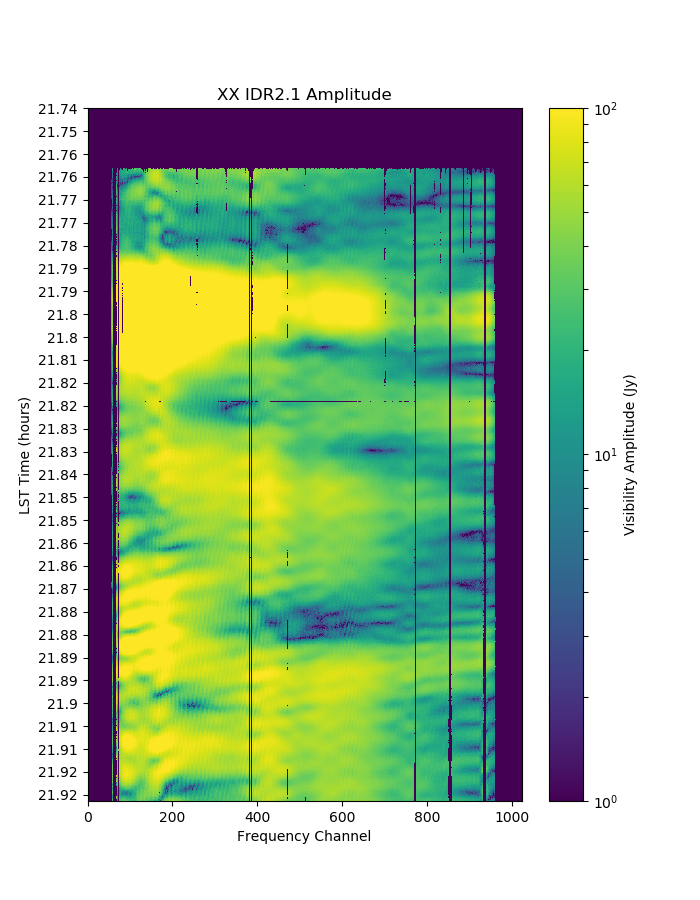

In [103]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(xx_array[start_index:-360]),aspect='auto',norm=SymLogNorm(vmin=1,vmax=100,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarrayxx)-start_index,step), np.round(lstarrayxx*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('XX IDR2.1 Amplitude')
plt.show()

<IPython.core.display.Javascript object>


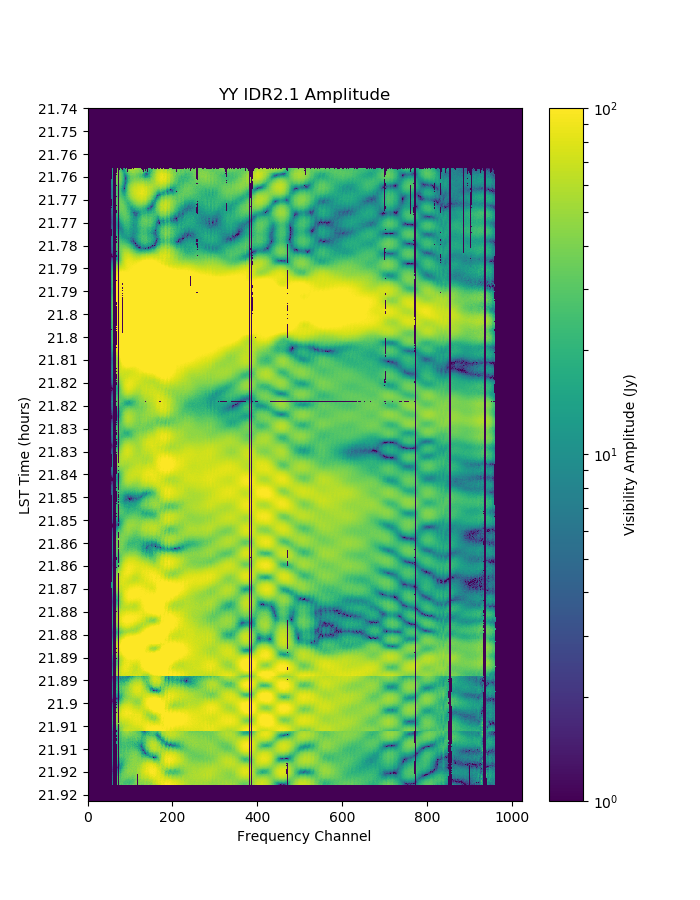

In [104]:
#Plot the figure
plt.figure(figsize=(7,9))
plt.imshow(np.abs(yy_array[start_index:,:]),aspect='auto',norm=SymLogNorm(vmin=1,vmax=100,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarrayxx)-start_index,step), np.round(lstarrayxx*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YY IDR2.1 Amplitude')
plt.show()

<IPython.core.display.Javascript object>


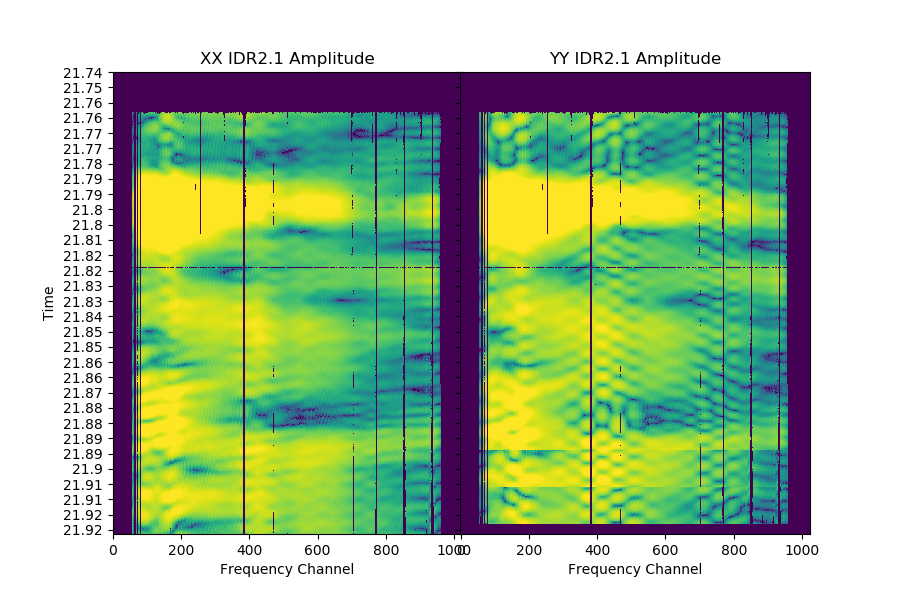

In [105]:
#Open a figure
fig = plt.figure(figsize=(9,6))

#Create two subplots and lock the axes in place
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, sharey = ax1, sharex = ax1)

#Plot the first image
plt.subplot(ax1)
plt.imshow(np.abs(xx_array[start_index:,:]),aspect='auto',norm=SymLogNorm(vmin=1,vmax=100,linthresh=.1))
plt.yticks(np.arange(0,len(lstarrayxx)-start_index,step), np.round(lstarrayxx*100)/100)
plt.ylabel('Time')
plt.xlabel('Frequency Channel')
plt.title('XX IDR2.1 Amplitude')

#Plot the second image
plt.subplot(ax2)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.imshow(np.abs(yy_array[start_index:,:]),aspect='auto',norm=SymLogNorm(vmin=1,vmax=100,linthresh=.1))
plt.yticks(np.arange(0,len(lstarrayxx)-start_index,step), np.round(lstarrayxx*100)/100)
#plt.colorbar(label='Amplitude')
plt.xlabel('Frequency Channel')
plt.title('YY IDR2.1 Amplitude')

#Adjust the spacing between the plots
plt.subplots_adjust(wspace = -.005)

## Part 2: Delay Spectrum and other plots

Now we are going to look at the delay spectrum of the data. We take the time average of the data array, then that the fourier transfrom across the frequency axis. The last step is to convert the frequencies into delays in nanoseconds. 

We also take a look at some other plots, including the visibility spectrum for each polarization, the ratio of the waterfall plots, and the difference of the waterfalls. 

As ideas come up, more plots may be added.

In [88]:
# Take the time average of the full night of data for the cross-polarizations
vis_avg_xy = np.mean(xy_array, axis=0)

# 1) Fourier transform "vis_avg" along the freq axis
vis_avg_delay_xy = np.fft.fftshift(np.fft.fft(vis_avg_xy))

# 2) Find the frequency width of a channel in GHz
freq_width_xy = np.diff(uvxy.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays_xy = np.fft.fftshift(np.fft.fftfreq(uvxy.Nfreqs,freq_width_xy))*1e9

#Take the time average of the full night of data
vis_avg_yx = np.mean(yx_array, axis=0)
print yx_array.shape

# 1) Fourier transform "vis_avg2" along the time axis
vis_avg_delay_yx = np.fft.fftshift(np.fft.fft(vis_avg_yx))
print vis_avg_delay_yx.shape
print vis_avg_delay_yx

# 2) Find the frequency width of a channel in GHz
freq_width_yx = np.diff(uvyx.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays_yx = np.fft.fftshift(np.fft.fftfreq(uvyx.Nfreqs,freq_width_yx))*1e9

(2374, 1024)
(1024,)
[23.642944 -6.7533417j 14.857716-10.583538j  10.516136 -8.369858j  ...
  8.866013+20.797668j   8.893463 +8.479218j  21.451508+11.158585j ]


In [89]:
# Take the time average of the full night of data for the parallel polarizations
vis_avg_xx = np.mean(xx_array, axis=0)

# 1) Fourier transform "vis_avg" along the freq axis
vis_avg_delay_xx = np.fft.fftshift(np.fft.fft(vis_avg_xx))

# 2) Find the frequency width of a channel in GHz
freq_width_xx = np.diff(uvxx.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays_xx = np.fft.fftshift(np.fft.fftfreq(uvxx.Nfreqs,freq_width_xx))*1e9

#Take the time average of the full night of data
vis_avg_yy = np.mean(yy_array, axis=0)
print yy_array.shape

# 1) Fourier transform "vis_avg2" along the time axis
vis_avg_delay_yy = np.fft.fftshift(np.fft.fft(vis_avg_yy))
print vis_avg_delay_yy.shape
print vis_avg_delay_yy

# 2) Find the frequency width of a channel in GHz
freq_width_yy = np.diff(uvyy.freq_array[0,:])[0]

# 3) Convert frequencies to delays and convert to ns. Numpy's fftfreq function takes two arguments:
#    the number of frequencies, and the frequency width you calculated above
delays_yy = np.fft.fftshift(np.fft.fftfreq(uvyy.Nfreqs,freq_width_yy))*1e9

(2014, 1024)
(1024,)
[-16.028046  +3.516632j -38.059677 +21.253403j   8.5620575+13.054176j ...
  -9.263287 -18.18637j    8.470421 -15.360371j -27.795853  -5.233032j]


<IPython.core.display.Javascript object>


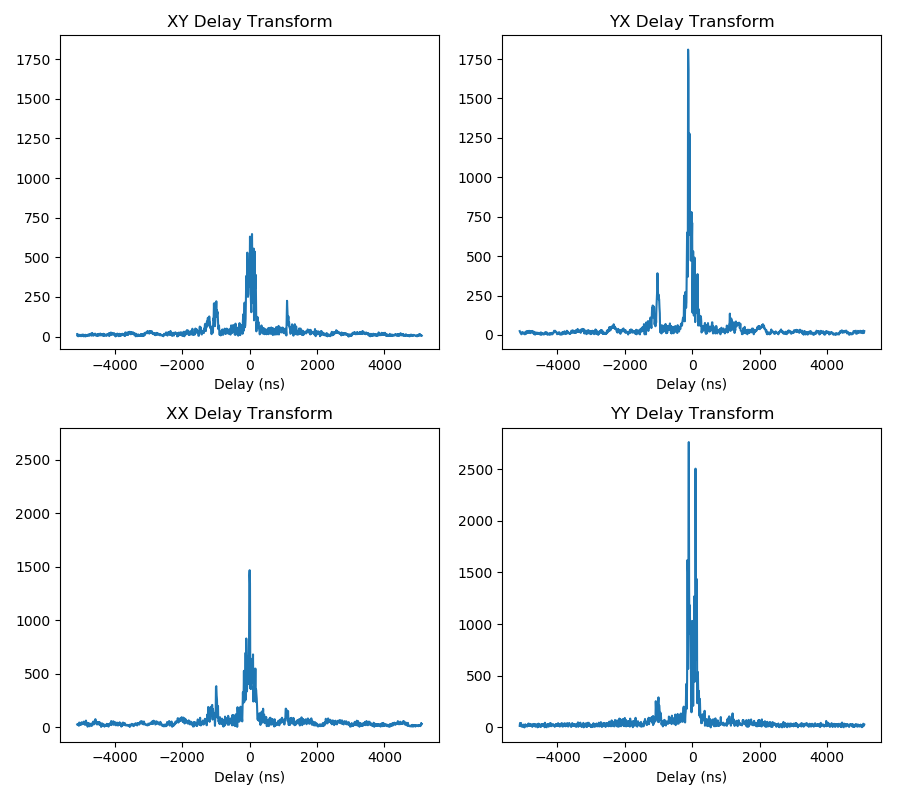

In [98]:
#Plot the delay spectrums for all four polarizations

plt.figure(figsize=(9,8))

plt.subplot(221)
plt.plot(delays_xy,np.abs(vis_avg_delay_xy))
plt.xlabel('Delay (ns)')
#plt.xlim(-1000,1000) # zoom-in
plt.ylim(-80,1900)
plt.title('XY Delay Transform');

plt.subplot(222)
plt.plot(delays_yx,np.abs(vis_avg_delay_yx))
plt.xlabel('Delay (ns)')
#plt.ylim(0,500)
#plt.xlim(-1000,1000) # zoom-in
plt.title('YX Delay Transform');

plt.subplot(223)
plt.plot(delays_xx,np.abs(vis_avg_delay_xx))
plt.xlabel('Delay (ns)')
#plt.xlim(-1000,1000) # zoom-in
plt.ylim(-137,2800)
plt.title('XX Delay Transform');

plt.subplot(224)
plt.plot(delays_yy,np.abs(vis_avg_delay_yy))
plt.xlabel('Delay (ns)')
#plt.ylim(0,500)
#plt.xlim(-1000,1000) # zoom-in
plt.title('YY Delay Transform')

plt.tight_layout()

Next, we look at the visibility spectrum to check how much of the noise seen is caused by delay in the signal

<IPython.core.display.Javascript object>


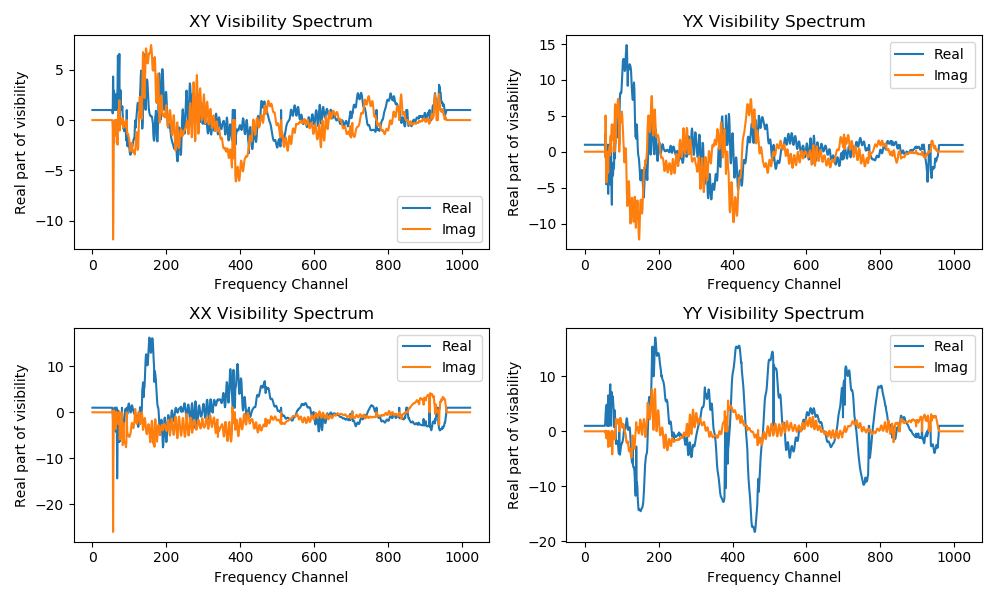

In [87]:
#Plot the visibility spectrums for all four polarizations
plt.figure(figsize=(10,8))
#Take the mean of the time axis and plot both real and imaginary parts

#Plot for xy data
plt.subplot(221)
plt.plot(np.mean(xy_array, axis=0).real, label='Real')
plt.plot(np.mean(xy_array, axis=0).imag, label='Imag')
plt.ylabel('Real part of visibility')
plt.xlabel('Frequency Channel')
plt.title('XY Visibility Spectrum')
plt.legend()

#Plot for yx data
plt.subplot(222)
plt.plot(np.mean(yx_array, axis=0).real, label='Real')
plt.plot(np.mean(yx_array, axis=0).imag, label='Imag')
plt.ylabel('Real part of visability')
plt.xlabel('Frequency Channel')
plt.title('YX Visibility Spectrum')
plt.legend()

#Plot for xx data
plt.subplot(223)
plt.plot(np.mean(xx_array, axis=0).real, label='Real')
plt.plot(np.mean(xx_array, axis=0).imag, label='Imag')
plt.ylabel('Real part of visibility')
plt.xlabel('Frequency Channel')
plt.title('XX Visibility Spectrum')
plt.legend()

#Plot for yy data
plt.subplot(224)
plt.plot(np.mean(yy_array, axis=0).real, label='Real')
plt.plot(np.mean(yy_array, axis=0).imag, label='Imag')
plt.ylabel('Real part of visability')
plt.xlabel('Frequency Channel')
plt.title('YY Visibility Spectrum')
plt.legend()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


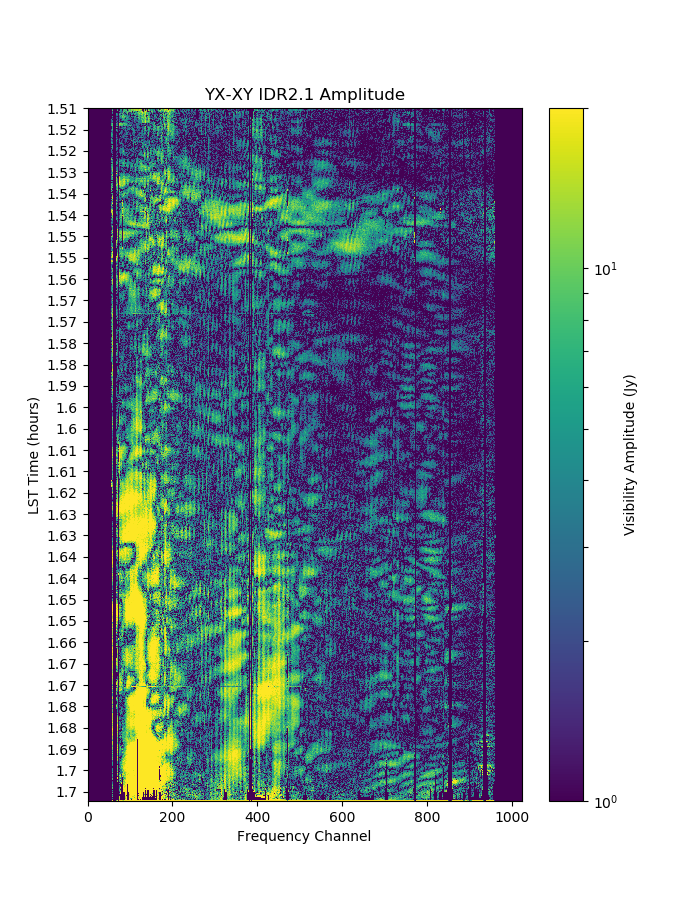

In [274]:
#Plot the difference between the cross-polarization waterfalls
plt.figure(figsize=(7,9))
plt.imshow(np.abs(np.abs(yx_array[0:-10][:])-np.abs(xy_array)),aspect='auto',norm=SymLogNorm(vmin=1,vmax=20,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarray),step), np.round(lstarray*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YX-XY IDR2.1 Amplitude')
plt.show()

<IPython.core.display.Javascript object>


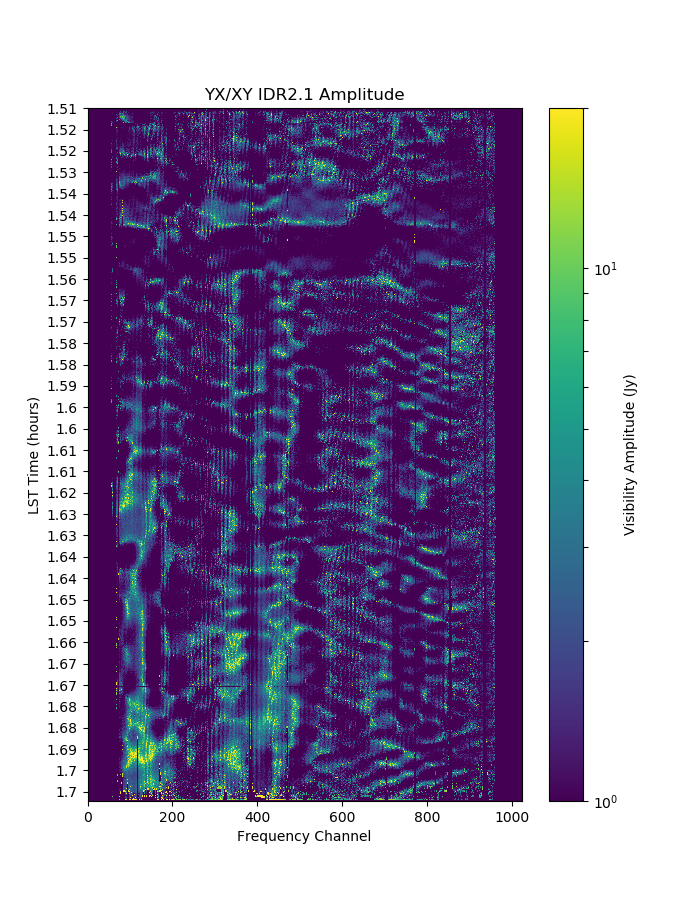

In [275]:
#Plot the ratio of the cross polarization waterfalls
plt.figure(figsize=(7,9))
plt.imshow(np.abs(yx_array[0:-10][:])/np.abs(xy_array),aspect='auto',norm=SymLogNorm(vmin=1,vmax=20,linthresh=.1))
#Format the yaxis tick marks and manually round the LST times for cleaner appearance
plt.yticks(np.arange(0,len(lstarray),step), np.round(lstarray*100)/100)
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.ylabel('LST Time (hours)')
plt.xlabel('Frequency Channel')
plt.title('YX/XY IDR2.1 Amplitude')
plt.show()

In [279]:
#Calculate the gains for the two waterfall plots above
gain_ratio = np.average(np.abs(yx_array[0:-10][:]))/np.average(np.abs(xy_array))
print gain_ratio

gain_diff = np.average(np.abs(yx_array[0:-10][:]))-np.average(np.abs(xy_array))
print gain_diff

1.1602628
0.92119265
